<a href="https://colab.research.google.com/github/NoraHK3/DataSciProject/blob/main/Model_Attempt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving all_images.zip to all_images.zip


In [3]:
# === 1. Imports ===
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
import zipfile
import os
import shutil

ZIP_FILE = "all_images.zip"
EXTRACT_DIR = "images"

# Remove existing directory if it exists
if os.path.exists(EXTRACT_DIR):
    shutil.rmtree(EXTRACT_DIR)

# Create directory
os.makedirs(EXTRACT_DIR, exist_ok=True)

# Extract zip
with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_DIR)

print("Images extracted to:", EXTRACT_DIR)



Images extracted to: images


In [5]:
import pandas as pd
import numpy as np
import os
import shutil
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
import matplotlib.pyplot as plt


In [6]:
# Load your metadata CSV (update filename if needed)
metadata_df = pd.read_csv("final_dataset_paths.csv")

metadata_df['image_file'] = metadata_df['image_file'].apply(lambda x: f"/content/images/{x}")

print("Loaded metadata_df with shape:", metadata_df.shape)
metadata_df.head()


Loaded metadata_df with shape: (1166, 4)


,dish_name,labels,image_file,scrape_date
0,Hijazi Almond Coffee,['Almond Coffee'],/content/images/img(1).jpg,30/09/2025
1,Shakeshawka Hijazi,['Shakshuka'],/content/images/img(2).jpg,30/09/2025
2,Kabsa,"['Rice', 'Meat']",/content/images/img(3).jpg,30/09/2025
3,Kleija,['Kleija'],/content/images/img(4).jpg,30/09/2025
4,Kabsa,"['Chicken', 'Rice']",/content/images/img(5).jpg,30/09/2025


In [7]:
import re

def safe_parse_labels(x):
    if not isinstance(x, str):
        return []

    # Remove brackets
    x = x.strip().lstrip("[").rstrip("]")

    # Split by comma
    parts = x.split(",")

    cleaned = []
    for p in parts:
        p = p.strip().strip("'").strip('"')   # remove quotes
        if p:                                 # ignore empty values
            cleaned.append(p)

    return cleaned

metadata_df['labels'] = metadata_df['labels'].apply(safe_parse_labels)


In [8]:
print(metadata_df['labels'].head())


0    [Almond Coffee]
1        [Shakshuka]
2       [Rice, Meat]
3           [Kleija]
4    [Chicken, Rice]
Name: labels, dtype: object


In [9]:
from collections import Counter

all_labels = []
for lst in metadata_df['labels']:
    all_labels.extend(lst)

label_counts = Counter(all_labels)

print("Total unique labels:", len(label_counts))
label_counts


Total unique labels: 52


Counter({'Almond Coffee': 12,
         'Shakshuka': 16,
         'Rice': 346,
         'Meat': 177,
         'Kleija': 12,
         'Chicken': 229,
         'Basbousa': 12,
         'Foul': 8,
         'Vegetable': 60,
         'Areeqa': 12,
         'Musabeeb': 16,
         'Jareesh': 44,
         'Sambousa': 24,
         'Bread': 52,
         'Soup': 36,
         'Saleeg': 20,
         'Luqaimat': 12,
         'Maqshoosh': 12,
         'Maamoul': 12,
         'Mutabbaq': 12,
         'Lahm Bi Ajeen': 16,
         'Molokhiya': 12,
         'Moussaka': 12,
         'Kibbeh': 12,
         'Qursan': 24,
         'Marqouq': 20,
         'Matazeez': 16,
         'Saleeg ': 8,
         'Cream Caramel': 12,
         'Jelly': 12,
         'Mohalabiya': 28,
         'Umm Ali': 12,
         'Kunafa': 20,
         'Salad': 108,
         'Potato': 24,
         'Roz Bi Laban': 12,
         'Pasta': 20,
         'Fish': 20,
         'Yogurt': 32,
         'Bishamel': 16,
         'Hummus': 16,
    

In [10]:
# Keep only original rows (no "-" in filename)
original_df = metadata_df[metadata_df['image_file'].apply(lambda x: "-" not in x)]


In [11]:
from collections import Counter

all_labels = []
for lst in original_df['labels']:
    all_labels.extend(lst)

label_counts = Counter(all_labels)

print("Total unique labels:", len(label_counts))
print(label_counts)


Total unique labels: 52
Counter({'Rice': 88, 'Chicken': 58, 'Meat': 45, 'Salad': 27, 'Vegetable': 15, 'Bread': 13, 'Jareesh': 11, 'Cake': 10, 'Soup': 9, 'Yogurt': 8, 'Mohalabiya': 7, 'Sambousa': 6, 'Qursan': 6, 'Potato': 6, 'Saleeg': 5, 'Marqouq': 5, 'Kunafa': 5, 'Pasta': 5, 'Fish': 5, 'Shakshuka': 4, 'Musabeeb': 4, 'Lahm Bi Ajeen': 4, 'Matazeez': 4, 'Bishamel': 4, 'Hummus': 4, 'Pastry': 4, 'Almond Coffee': 3, 'Kleija': 3, 'Basbousa': 3, 'Areeqa': 3, 'Luqaimat': 3, 'Maqshoosh': 3, 'Maamoul': 3, 'Mutabbaq': 3, 'Molokhiya': 3, 'Moussaka': 3, 'Kibbeh': 3, 'Cream Caramel': 3, 'Jelly': 3, 'Umm Ali': 3, 'Roz Bi Laban': 3, 'Qishd': 3, 'Henainee': 3, 'Mousakhan': 3, 'Falafel': 3, 'Grape Leaves': 3, 'Foul': 2, 'Saleeg ': 2, 'Meat Soup': 2, 'Muhammara': 2, 'Afees': 2, 'Fatteh': 2})


In [12]:
rare_labels = {label: count for label, count in label_counts.items() if count < 2}

print("Labels with fewer than 2 original samples:")
rare_labels


Labels with fewer than 2 original samples:


{}

In [13]:
metadata_df['labels'] = metadata_df['labels'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

A. MULTI-LABEL STRATIFIED SPLIT

STEP 1 — Extract grouping key (original image ID)

In [14]:
import re
import pandas as pd

# Extract group key: everything inside parentheses
def extract_group_id(path):
    fname = path.split('/')[-1]
    match = re.match(r"img\((\d+)\)", fname)
    return int(match.group(1)) if match else None

metadata_df['group_id'] = metadata_df['image_file'].apply(extract_group_id)


STEP 2 — Build grouped label sets (one label list per original image)

In [15]:
# Group labels by group_id (original image)
grouped_labels = (
    metadata_df.groupby("group_id")["labels"]
    .apply(lambda rows: sorted(list(set(sum(rows, [])))))   # union of labels
)

STEP 3 — Multi-label Stratified Split (IterativeStratification)

In [16]:
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.3 MB/s eta 0:00:00


In [17]:
from skmultilearn.model_selection import IterativeStratification
import numpy as np

# Build multilabel matrix (binary indicator)
unique_labels = sorted({label for row in grouped_labels for label in row})
label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}

def encode_multilabel(label_list):
    arr = np.zeros(len(unique_labels), dtype=int)
    for lab in label_list:
        arr[label_to_idx[lab]] = 1
    return arr

Y = np.array(grouped_labels.apply(encode_multilabel).to_list())
group_ids = grouped_labels.index.to_list()
group_ids = np.array(group_ids)

# Perform stratified split
splitter = IterativeStratification(
    n_splits=2,
    order=2
)

train_idx, test_idx = next(splitter.split(group_ids.reshape(-1, 1), Y))

train_groups = group_ids[train_idx]
test_groups = group_ids[test_idx]

print("TRAIN GROUPS:", len(train_groups))
print("TEST GROUPS:", len(test_groups))


TRAIN GROUPS: 149
TEST GROUPS: 144


STEP 4 — Expand groups back to full images

In [18]:
train_df = metadata_df[metadata_df['group_id'].isin(train_groups)].reset_index(drop=True)
test_df  = metadata_df[metadata_df['group_id'].isin(test_groups)].reset_index(drop=True)

print("Train image rows:", len(train_df))
print("Test image rows:", len(test_df))

Train image rows: 593
Test image rows: 573


STEP 5 — Build one-hot/multi-hot vector for training

In [25]:
# STEP 5 — Build one-hot/multi-hot vector for training
def encode_labels(label_list):
    arr = np.zeros(len(unique_labels), dtype=int)
    for lab in label_list:
        arr[label_to_idx[lab]] = 1
    return arr

train_df['label_multihot'] = train_df['labels'].apply(encode_labels)
test_df['label_multihot'] = test_df['labels'].apply(encode_labels)


train_df['label_multihot'] = train_df['label_multihot'].apply(lambda x: np.array(x, dtype=np.float32))
test_df['label_multihot'] = test_df['label_multihot'].apply(lambda x: np.array(x, dtype=np.float32))

NUM_CLASSES = len(unique_labels)
NUM_CLASSES


52

B. MODEL DEFINITIONS (MobileNetV2 + EfficientNetB0)

Custom multi-label accuracy

In [26]:
import tensorflow as tf

def multilabel_accuracy(y_true, y_pred):
    y_pred_binary = tf.cast(y_pred > 0.5, tf.float32)
    correct = tf.cast(tf.reduce_all(tf.equal(y_true, y_pred_binary), axis=1), tf.float32)
    return tf.reduce_mean(correct)

MobileNetV2

In [27]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def build_mobilenetv2_multilabel(num_classes):
    base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
    base.trainable = False

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="sigmoid")(x)

    model = models.Model(base.input, out)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["binary_accuracy", multilabel_accuracy]
    )
    return model

EfficientNetB0

In [28]:
from tensorflow.keras.applications import EfficientNetB0

def build_efficientnet_multilabel(num_classes):
    base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
    base.trainable = False

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="sigmoid")(x)

    model = models.Model(base.input, out)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["binary_accuracy", multilabel_accuracy]
    )
    return model

C. TRAINING (50 epochs + EarlyStopping)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Dataset generators

In [37]:
# STEP 1: Filter out missing images from both DataFrames
def filter_missing_images(df):
    """Remove rows where the image file doesn't exist"""
    mask = df['image_file'].apply(lambda x: os.path.exists(x))
    print(f"Removing {len(df) - mask.sum()} missing images from DataFrame")
    return df[mask].reset_index(drop=True)

# Apply the filter
train_df = filter_missing_images(train_df)
test_df = filter_missing_images(test_df)

print(f"After filtering: {len(train_df)} train images, {len(test_df)} test images")

# STEP 2: Update the generator to handle this safely
def create_simple_generator(df, batch_size=32):
    paths = df['image_file'].values
    labels = np.stack(df['label_multihot'].values).astype(np.float32)

    def generator():
        while True:
            indices = np.random.permutation(len(df))
            for start_idx in range(0, len(indices), batch_size):
                end_idx = min(start_idx + batch_size, len(indices))
                batch_indices = indices[start_idx:end_idx]

                # Skip if batch is empty (shouldn't happen after filtering)
                if len(batch_indices) == 0:
                    continue

                batch_images = []
                batch_labels = []

                for idx in batch_indices:
                    try:
                        img = tf.keras.preprocessing.image.load_img(
                            paths[idx],
                            target_size=(224, 224)
                        )
                        img = tf.keras.preprocessing.image.img_to_array(img)
                        img = img / 255.0
                        batch_images.append(img)
                        batch_labels.append(labels[idx])
                    except Exception as e:
                        print(f"Warning: Could not load {paths[idx]}: {e}")
                        continue

                # Only yield if we have images
                if len(batch_images) > 0:
                    yield np.array(batch_images), np.array(batch_labels)

    return generator()

# STEP 3: Create generators with filtered data
train_gen = create_simple_generator(train_df, batch_size=32)
test_gen = create_simple_generator(test_df, batch_size=32)

# STEP 4: Verify we have data
print(f"Train batches per epoch: {len(train_df) // 32}")
print(f"Test batches per epoch: {len(test_df) // 32}")

Removing 1 missing images from DataFrame
Removing 1 missing images from DataFrame
After filtering: 592 train images, 572 test images
Train batches per epoch: 18
Test batches per epoch: 17


Train MobileNetV2

In [38]:
history_mobilenet = mobilenet.fit(
    train_gen,
    steps_per_epoch=max(1, len(train_df) // 32),  # Updated
    validation_data=test_gen,
    validation_steps=max(1, len(test_df) // 32),   # Updated
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - binary_accuracy: 0.7944 - loss: 0.4129 - multilabel_accuracy: 0.0109 - val_binary_accuracy: 0.9741 - val_loss: 0.1377 - val_multilabel_accuracy: 0.0221
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - binary_accuracy: 0.9687 - loss: 0.1373 - multilabel_accuracy: 0.0718 - val_binary_accuracy: 0.9753 - val_loss: 0.1014 - val_multilabel_accuracy: 0.0404
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - binary_accuracy: 0.9759 - loss: 0.0858 - multilabel_accuracy: 0.1382 - val_binary_accuracy: 0.9757 - val_loss: 0.0932 - val_multilabel_accuracy: 0.0575
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - binary_accuracy: 0.9781 - loss: 0.0734 - multilabel_accuracy: 0.1805 - val_binary_accuracy: 0.9773 - val_loss: 0.0873 - val_multilabel_accuracy: 0.1129
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - binary_accuracy: 0.9838 - loss: 0.0503 - multilabel_accuracy: 0.3211 - val_binary_accuracy: 0.9762 - val_loss: 0.0896 - val_multilab

Train EfficientNetB0

In [42]:
# Build EfficientNetB0 model
efficientnet = build_efficientnet_multilabel(NUM_CLASSES)


# Train EfficientNetB0
history_efficientnet = efficientnet.fit(
    train_gen,
    steps_per_epoch=max(1, len(train_df) // 32),
    validation_data=test_gen,
    validation_steps=max(1, len(test_df) // 32),
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - binary_accuracy: 0.8180 - loss: 0.4355 - multilabel_accuracy: 0.0014 - val_binary_accuracy: 0.9716 - val_loss: 0.1221 - val_multilabel_accuracy: 0.0000e+00
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - binary_accuracy: 0.9685 - loss: 0.1329 - multilabel_accuracy: 0.0086 - val_binary_accuracy: 0.9709 - val_loss: 0.1229 - val_multilabel_accuracy: 0.0000e+00
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - binary_accuracy: 0.9679 - loss: 0.1315 - multilabel_accuracy: 0.0062 - val_binary_accuracy: 0.9713 - val_loss: 0.1116 - val_multilabel_accuracy: 0.0000e+00
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - binary_accuracy: 0.9705 - loss: 0.1220 - multilabel_accuracy: 0.0158 - val_binary_accuracy: 0.9710 - val_loss: 0.1104 - val_multilabel_accuracy: 0.0000e+00
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - binary_accuracy: 0.9705 - loss: 0.1198 - multilabel_accuracy: 0.0037 - val_binary_accuracy: 0.9712 - val_loss: 0.110

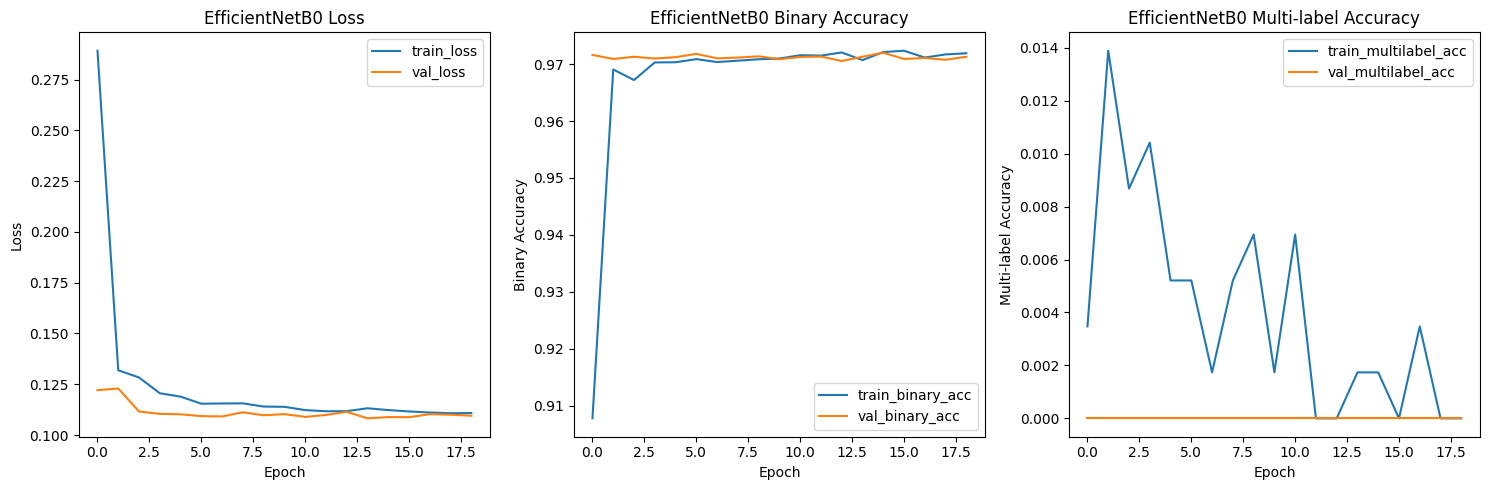

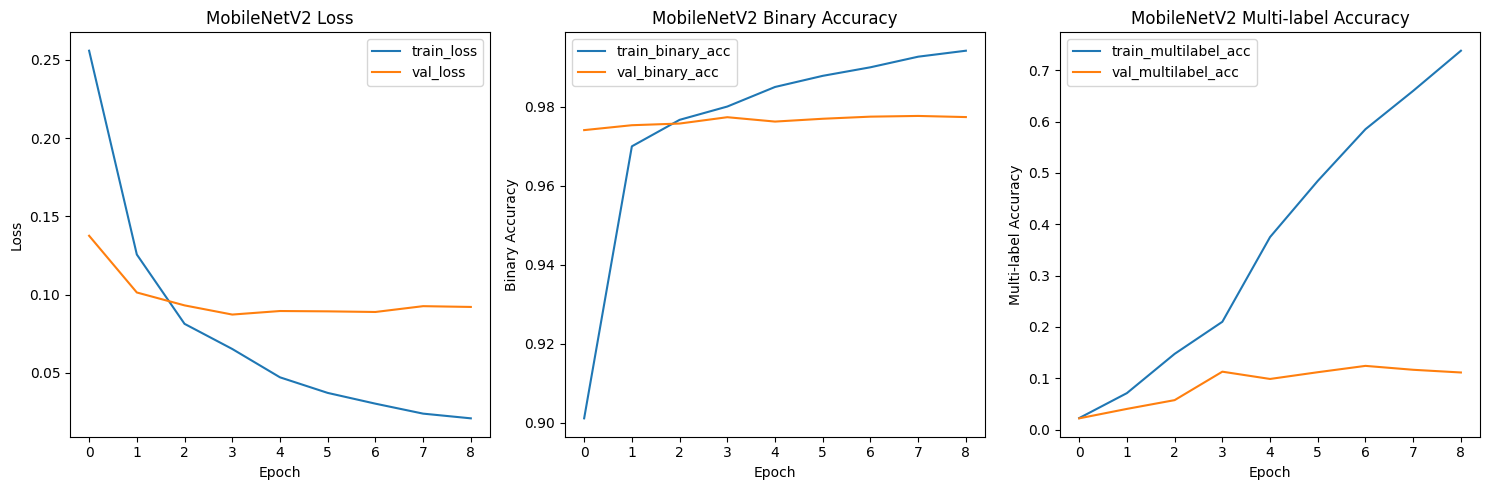

In [43]:
# === 11. Plot training history for current metrics ===
import matplotlib.pyplot as plt

def plot_history_current_metrics(history, title="Model Performance"):
    plt.figure(figsize=(15,5))

    # Loss
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Binary Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['binary_accuracy'], label='train_binary_acc')
    plt.plot(history.history['val_binary_accuracy'], label='val_binary_acc')
    plt.title(f'{title} Binary Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Accuracy')
    plt.legend()

    # Multi-label Accuracy
    plt.subplot(1,3,3)
    plt.plot(history.history['multilabel_accuracy'], label='train_multilabel_acc')
    plt.plot(history.history['val_multilabel_accuracy'], label='val_multilabel_acc')
    plt.title(f'{title} Multi-label Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Multi-label Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for both models
plot_history_current_metrics(history_efficientnet, "EfficientNetB0")
plot_history_current_metrics(history_mobilenet, "MobileNetV2")

In [48]:
# === Visualize sample predictions ===
import pandas as pd
import numpy as np
import tensorflow as tf

def show_sample_predictions(model, test_df, unique_labels, sample_size=10):
    # Get sample from test dataset
    sample_df = test_df.sample(n=sample_size, random_state=42)

    # Load and preprocess images
    images = []
    for path in sample_df['image_file']:
        img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img_array)
    images = np.array(images)

    # Get predictions
    preds = model.predict(images, verbose=0)

    # Convert predictions and actual labels to readable format
    preds_labels = []
    actual_labels = []

    for i, (pred, actual_multihot) in enumerate(zip(preds, sample_df['label_multihot'])):
        # Predicted labels (using threshold 0.5)
        pred_labels = [unique_labels[j] for j, p in enumerate(pred) if p >= 0.5]
        preds_labels.append(pred_labels)

        # Actual labels
        actual_label_names = [unique_labels[j] for j, l in enumerate(actual_multihot) if l == 1]
        actual_labels.append(actual_label_names)

    # Create DataFrame
    df_sample = pd.DataFrame({
        "image_file": sample_df['image_file'].apply(lambda x: x.split('/')[-1]),  # Show only filename
        "predicted_labels": preds_labels,
        "actual_labels": actual_labels,
        "correct": [set(pred) == set(actual) for pred, actual in zip(preds_labels, actual_labels)]
    })

    # Calculate accuracy
    multi_label_accuracy = df_sample['correct'].mean() * 100
    print(f"Multi-label accuracy on this sample: {multi_label_accuracy:.1f}%")

    display(df_sample)

    return df_sample

# Example usage:
print("MobileNetV2 Sample Predictions:")
mobile_sample_results = show_sample_predictions(mobilenet, test_df, unique_labels, sample_size=20)

print("\nEfficientNetB0 Sample Predictions:")
effnet_sample_results = show_sample_predictions(efficientnet_fixed, test_df, unique_labels, sample_size=20)

MobileNetV2 Sample Predictions:
Multi-label accuracy on this sample: 5.0%


,image_file,predicted_labels,actual_labels,correct
512,img(291)-H.jpg,[],[Luqaimat],False
70,img(175).jpg,[Rice],"[Rice, Vegetable]",False
131,img(305).jpg,[],"[Chicken, Saleeg]",False
404,img(212)-H.jpg,[],[Sambousa],False
543,img(307)-V.jpg,[],[Umm Ali],False
320,img(151)-H.jpg,[],[Yogurt],False
188,img(42)-H.jpg,[],[Soup],False
29,img(72).png,[Rice],"[Chicken, Rice]",False
81,img(205).png,[],[Pastry],False
309,img(142)-V.jpg,[],[Hummus],False



EfficientNetB0 Sample Predictions:
Multi-label accuracy on this sample: 0.0%


,image_file,predicted_labels,actual_labels,correct
512,img(291)-H.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Luqaimat],False
70,img(175).jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...","[Rice, Vegetable]",False
131,img(305).jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...","[Chicken, Saleeg]",False
404,img(212)-H.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Sambousa],False
543,img(307)-V.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Umm Ali],False
320,img(151)-H.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Yogurt],False
188,img(42)-H.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Soup],False
29,img(72).png,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...","[Chicken, Rice]",False
81,img(205).png,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Pastry],False
309,img(142)-V.jpg,"[Afees, Almond Coffee, Areeqa, Basbousa, Bisha...",[Hummus],False
